# How many samples do I need?

#### Author: David Linnard Wheeler | dlinnard@berkeley.edu 

## Motivation

Let's say that we want to test the hypothesis that grain-free dog diets do not reduce taurine levels (an amino acid that, when deficient, is associated with canine dilated cardiomyopathy (DCM)) in dogs compared to the standard grain-inclusive diet.

More formally: 
   - $H_0$: $\overline{x}_{0} = \overline{x}_{gf}$
   - $H_A$: $\neg H_0 \implies \overline{x}_{0} \neq \overline{x}_{gf}$
    
   where:
       - $\overline{x}_{0}$ = the mean $\overline{x}$ sampled from dogs who ate a grain-inclusive diet
       - $\overline{x}_{gf}$ = the mean $\overline{x}$ sampled from dogs who ate a grain-free diet 

**From this formulation, how many samples do we *need* from dogs fed grain-free diets to detect an effect, if one exists?**

To this question, we need to invoke **power**: $P(\text{reject}\;H_0|H_0 \text{ is false}) \equiv 1-\underbrace{P(\text{do not reject }H_0| H_0\text{ is false})}_\text{type II error = $\beta$} \equiv 1-\beta$

Visually, power can be expressed:

In [3]:
library(repr)
library(plotrix)
library(pwr)

The $H_0$ distribution with mean, $\overline{x}_{0}$. Note that this data is simulated to illustrate statistical concepts- it should not be interpreted as evidence for or against any type of dog diet!

$\overline{x}_{0}$

In [88]:
# Generate data
x_0 = rnorm(n=10, mean=25, sd=5)

$\overline{x}_{gf}$

In [3]:
# Generate data
x_gf = rnorm(n=10, mean=30, sd=5)

$H_0$: $\overline{x}_{0} = \overline{x}_{gf}$

In [4]:
t.test(x=x_gf, y=x_0,
      alternative="two.sided",
      var.equal=TRUE)


	Two Sample t-test

data:  x_gf and x_0
t = 1.0189, df = 18, p-value = 0.3217
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.522976  7.274705
sample estimates:
mean of x mean of y 
 28.92480  26.54894 


## To understand power, let's visualize it

**First, simulate many test-statistics**

In [4]:
## Test statistics
# Ho
TestStatisticsHo = replicate(1000,
                           t.test(x=rnorm(n=10, mean=25, sd=5),
                                  y=rnorm(n=10, mean=25, sd=5))$statistic)

# Ha
TestStatisticsHa = replicate(1000,
                           t.test(x=rnorm(n=10, mean=30, sd=5),
                                  y=rnorm(n=10, mean=25, sd=5))$statistic)

**Build data.table**

In [5]:
library(data.table)
library(ggplot2)

In [6]:
dt = data.table(
"ID"=seq(1,2000),
"Hypothesis"= c(rep("null",1000),rep("alternative",1000))
    )

**Add test statistic column**

In [7]:
dt[, "TestStatistic" := c(TestStatisticsHo,TestStatisticsHa)] 

**Sanity checks**

In [8]:
mean(dt[Hypothesis == "null", TestStatistic]) == mean(TestStatisticsHo)
mean(dt[Hypothesis == "alternative", TestStatistic]) == mean(TestStatisticsHa)

[1] TRUE

[1] TRUE

**plot**

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'e

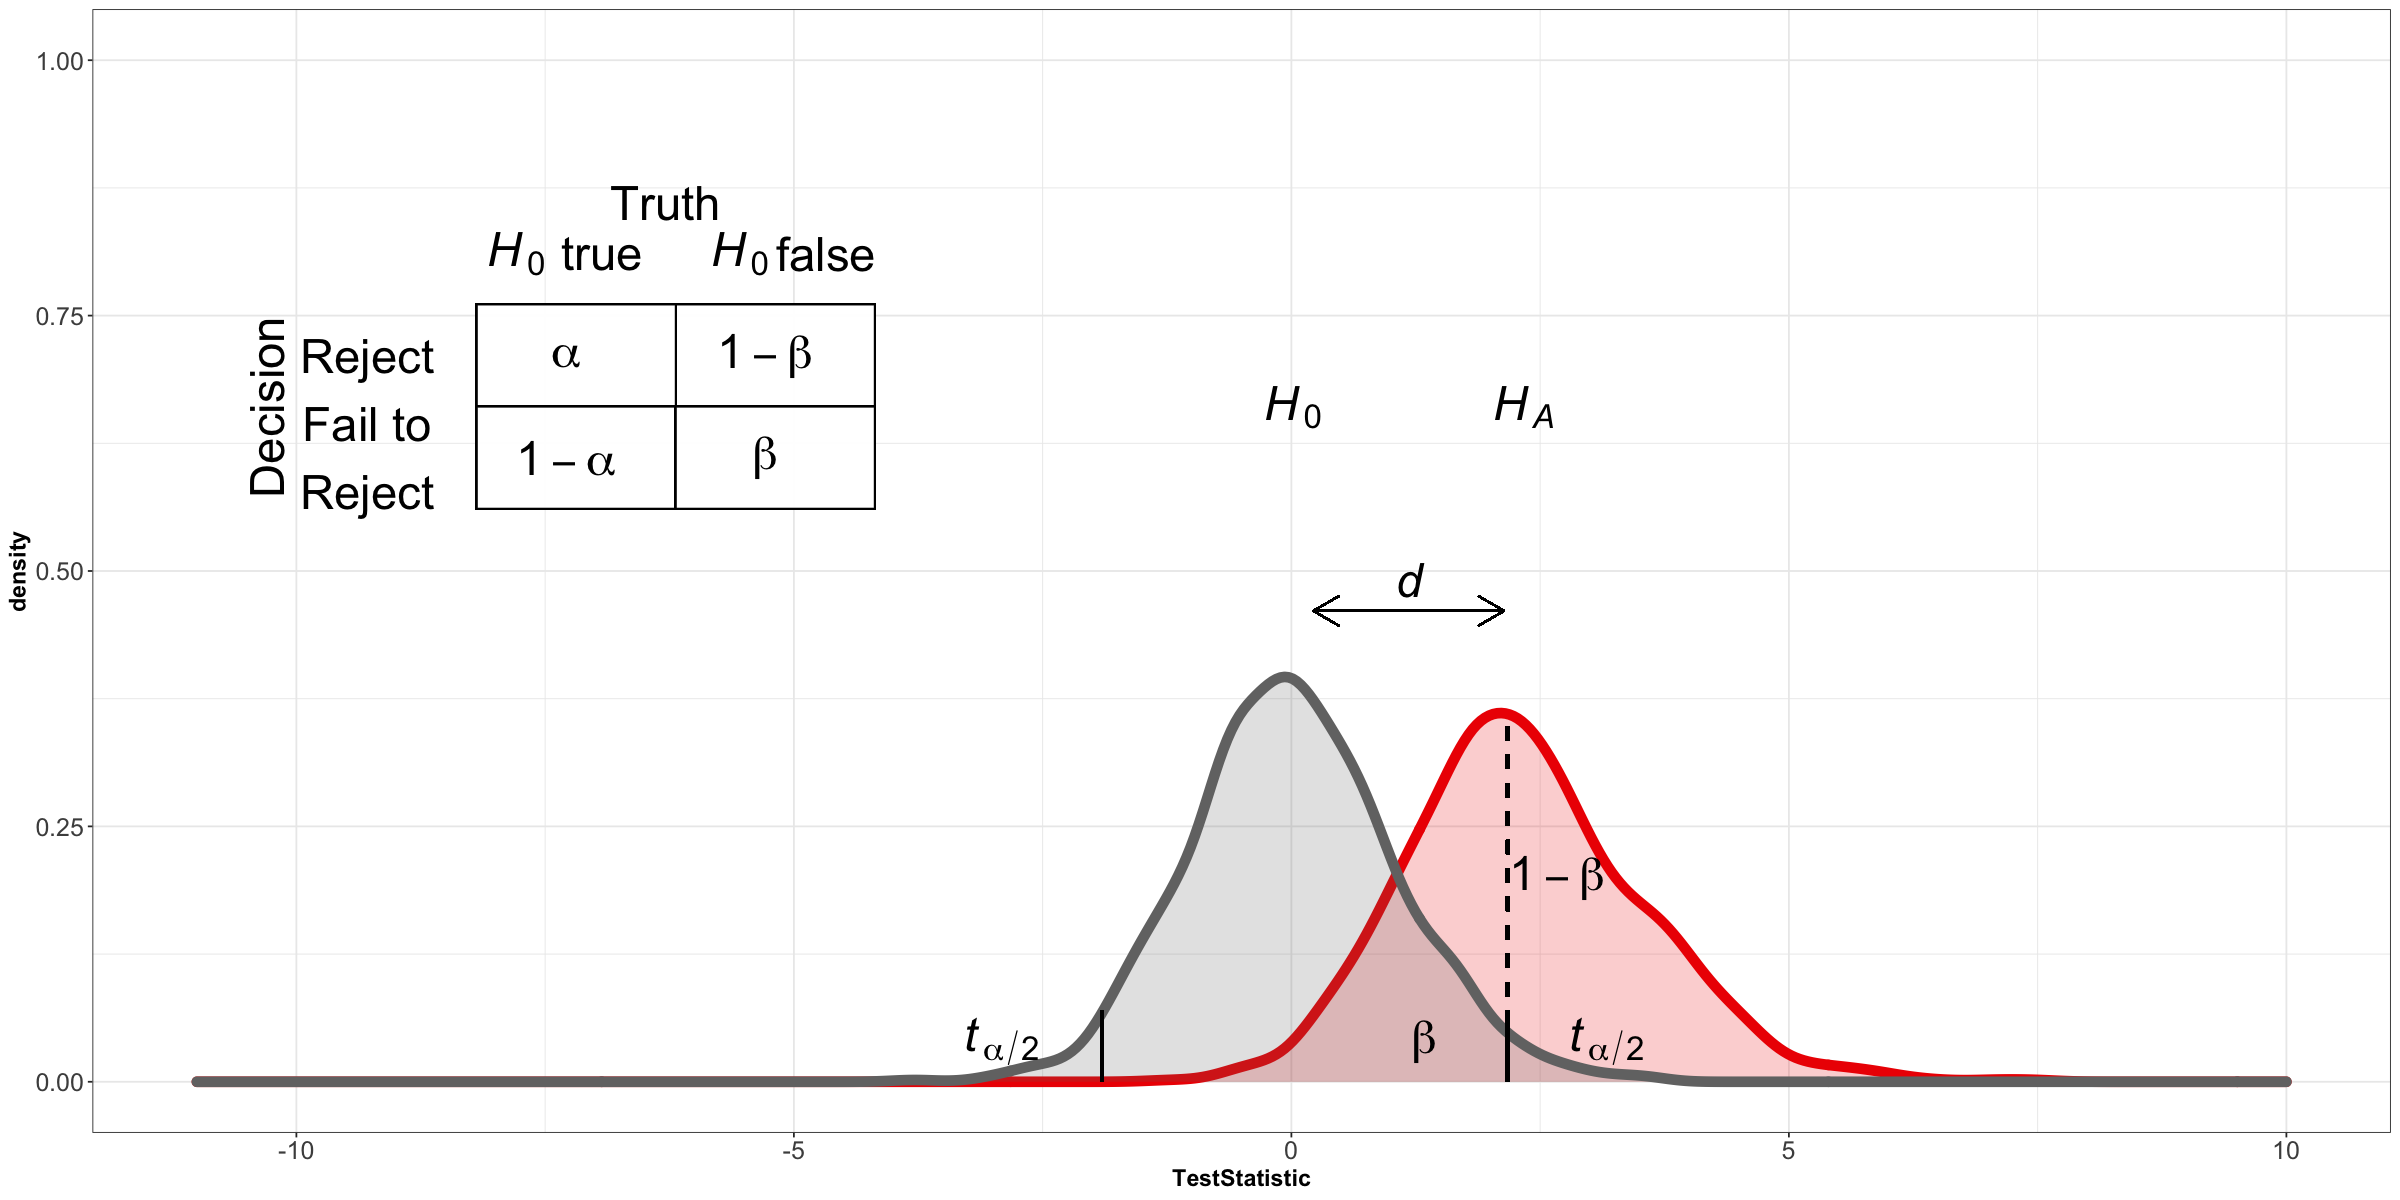

In [11]:
# Change plot size to X x Y
options(repr.plot.width=20, repr.plot.height=10)
# Plot
ggplot(dt, aes(x=TestStatistic)) +
  geom_density(aes(color=Hypothesis,fill=Hypothesis), lwd=3, alpha = 0.2)+
  scale_color_manual(values=c("red2", "grey45"))+
  scale_fill_manual(values=c("red2", "grey45"))+
  theme_bw()+
  theme(axis.text.x=element_text(size=15))+
  theme(axis.text.y=element_text(size=15))+
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))+
  theme(legend.position="none")+
  ylim(0,1) + xlim(-11,10)+
## Fill density

## TEXT
# Ho
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.3,
          label=expression(paste(italic(H[0]))))+
# Ha
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.3,
          label=expression(paste(italic(H[A]))))+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHo)+0.2,
                  y=max(TestStatisticsHo)/10 + 0.1,
                  xend=mean(TestStatisticsHa)-0.2,
                  yend=max(TestStatisticsHo)/10 + 0.1),
              arrow=arrow())+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHa)-0.2,
                  y=max(TestStatisticsHo)/10 + 0.1,
                  xend=mean(TestStatisticsHo)+0.2,
                  yend=max(TestStatisticsHo)/10 + 0.1),
              arrow=arrow())+
# Effect size label
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]) + (1/2 * mean(dt[Hypothesis == "alternative", TestStatistic])),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.13,
          label=expression(paste(italic(d))))+
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1) + 
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1)+
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))])-1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2])))) +
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))])+1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2]))))+
# Power = 1-beta = sensitivity
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))])+0.5,
          y=0.2,col="black",
          label=expression(paste(italic(1-beta))))+
# True positives = power = 1-beta = sensitivity cutoff
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  y=0,
                  yend=max(dt[Hypothesis == "null", TestStatistic])/10),
                  color="black", 
                  lty=2, lwd=1)+
# False negatives = type II error
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic])-1,
          y=0.04, col="black",
          label=expression(paste(italic(beta))))+

### Confusion matrix
## Labels
# Truth
 annotate("text",size=10,
          x=min(TestStatisticsHo)-2.5,
          y=max(TestStatisticsHo)/10 + 0.5,
          label="Truth")+
# H0 true
 annotate("text",size=10,
          x=min(TestStatisticsHo)-4,
          y=max(TestStatisticsHo)/10 + 0.45,
          label=c(expression(paste(italic(H[0]))),"             true"))+
# H0 false
 annotate("text",size=10,
          x=min(TestStatisticsHo)-1.75,
          y=max(TestStatisticsHo)/10 + 0.45,
          label=c(expression(paste(italic(H[0]))),"             false"))+
# Decision
 annotate("text",size=10,
          x=min(TestStatisticsHo)-6.5,
          y=max(TestStatisticsHo)/10 + 0.3,
          label="Decision",angle=90)+
# Reject
 annotate("text",size=10,
          x=min(TestStatisticsHo)-5.5,
          y=max(TestStatisticsHo)/10 + 0.35,
          label="Reject")+
# Fail to reject
 annotate("text",size=10,
          x=min(TestStatisticsHo)-5.5,
          y=max(TestStatisticsHo)/10 + 0.25,
          label="Fail to\nReject")+

### Contents
## True positives
 geom_rect(mapping=aes(xmin=min(TestStatisticsHo) - 2.4,
                       xmax=min(TestStatisticsHo) - 0.4,
                       ymin=max(TestStatisticsHo)/10 + 0.3,
                       ymax=max(TestStatisticsHo)/10 + 0.4),fill="white",
           color="black", alpha=0.5)+
# 1-beta = sensitivity
 annotate("text",size=10,
          x=min(TestStatisticsHo) - 1.5,
          y=max(TestStatisticsHo)/10 + 0.35,
          label=expression(paste(italic(1-beta))))+

## False positives
 geom_rect(mapping=aes(xmin=min(TestStatisticsHo) - 4.4,
                       xmax=min(TestStatisticsHo) - 2.4,
                       ymin=max(TestStatisticsHo)/10 + 0.3,
                       ymax=max(TestStatisticsHo)/10 + 0.4),fill="white",
           color="black", alpha=0.5)+
# Alpha = type I error
 annotate("text",size=10,
          x=min(TestStatisticsHo) - 3.5,
          y=max(TestStatisticsHo)/10 + 0.35,
          label=expression(paste(italic(alpha))))+

## True negatives
 geom_rect(mapping=aes(xmin=min(TestStatisticsHo) - 4.4,
                       xmax=min(TestStatisticsHo) - 2.4,
                       ymin=max(TestStatisticsHo)/10 + 0.2,
                       ymax=max(TestStatisticsHo)/10 + 0.3),fill="white",
           color="black", alpha=0.5)+
# 1-Alpha = specificity
 annotate("text",size=10,
          x=min(TestStatisticsHo) - 3.5,
          y=max(TestStatisticsHo)/10 + 0.25,
          label=expression(paste(italic(1-alpha))))+

## False negatives
 geom_rect(mapping=aes(xmin=min(TestStatisticsHo) - 2.4,
                       xmax=min(TestStatisticsHo) - 0.4,
                       ymin=max(TestStatisticsHo)/10 + 0.2,
                       ymax=max(TestStatisticsHo)/10 + 0.3),fill="white",
           color="black", alpha=0.5)+
# beta = Type II error
 annotate("text",size=10,
          x=min(TestStatisticsHo) - 1.5,
          y=max(TestStatisticsHo)/10 + 0.25,
          label=expression(paste(italic(beta))))


### Note that power depends on:
> - the effect size (e.g. the magnitude of the distance between means) which can be absolute or relative
> - some expression of variability (e.g. sample standard deviation, $s$)
> -$N$
> - $\alpha$. Notice that, aside from considering departures from the $\alpha$ = 0.05 convention, the allocation of $\alpha$ to one or two tails of the $H_0$ affects power.

**Question: which of these can we actually change?**

### Let's change $N$ and see what happens

- **First let's increase $N$ from $N=10$ to $N=100$**

In [35]:
## Test statistics
# Ho
TestStatisticsHo = replicate(1000,
                           t.test(x=rnorm(n=100, mean=25, sd=5),
                                  y=rnorm(n=100, mean=25, sd=5))$statistic)

# Ha
TestStatisticsHa = replicate(1000,
                           t.test(x=rnorm(n=100, mean=30, sd=5),
                                  y=rnorm(n=100, mean=25, sd=5))$statistic)
## Build data table
dt = data.table(
"ID"=seq(1,2000),
"Hypothesis"= c(rep("null",1000),rep("alternative",1000))
    )

## Add test statictic column
dt[, "TestStatistic" := c(TestStatisticsHo, TestStatisticsHa)] 

## Sanity checks
mean(dt[Hypothesis == "null", TestStatistic]) == mean(TestStatisticsHo)
mean(dt[Hypothesis == "alternative", TestStatistic]) == mean(TestStatisticsHa)

[1] TRUE

[1] TRUE

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


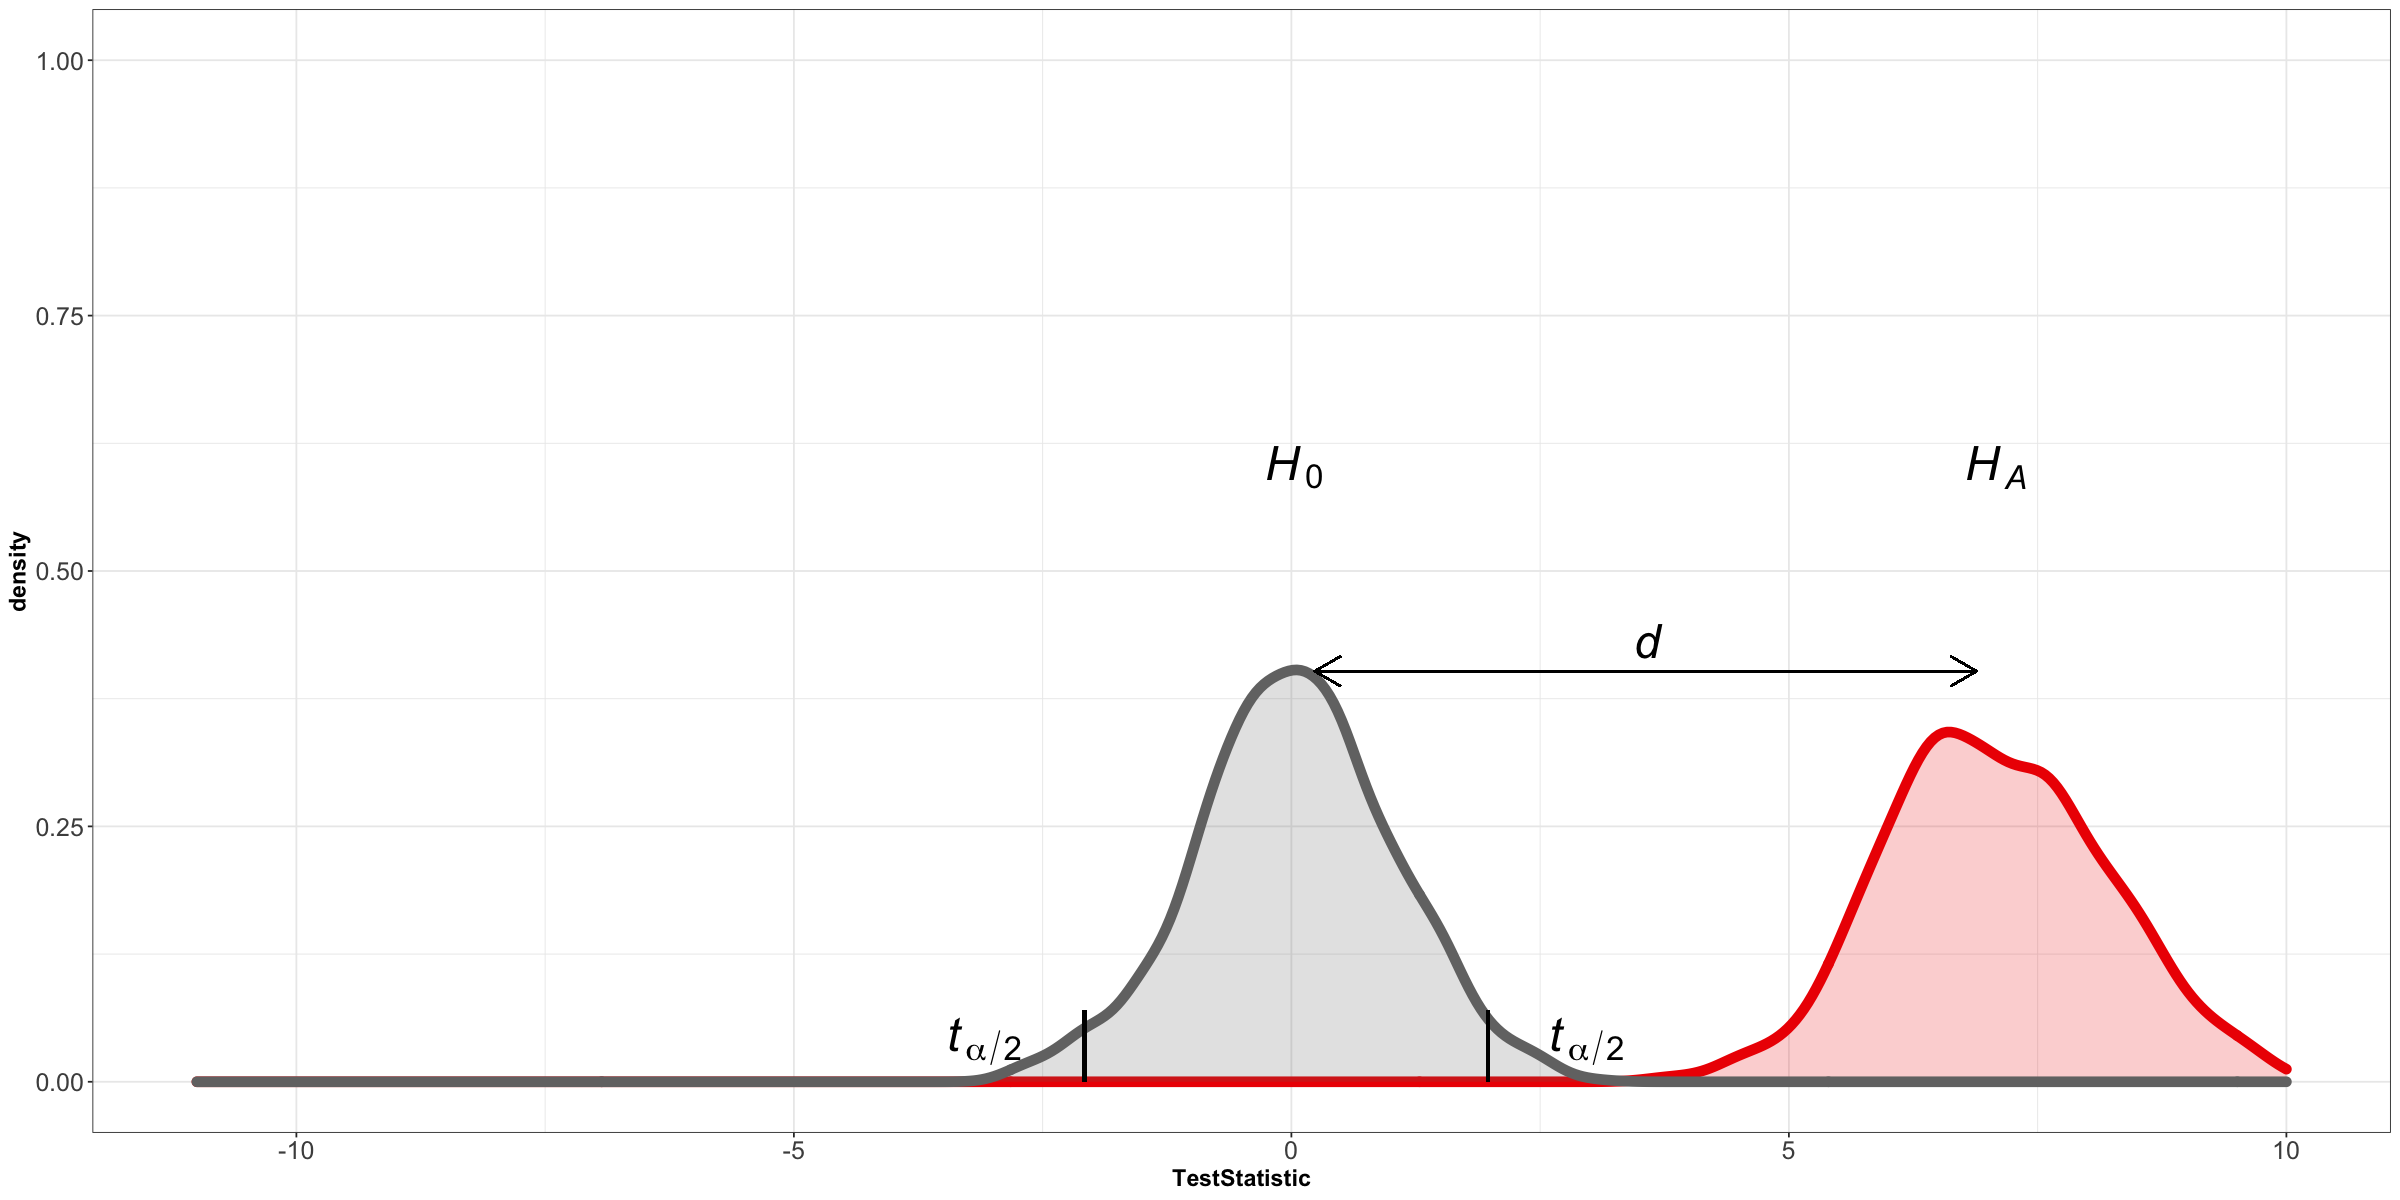

In [36]:
# Change plot size to X x Y
options(repr.plot.width=20, repr.plot.height=10)
# Plot
ggplot(dt, aes(x=TestStatistic)) +
  geom_density(aes(color=Hypothesis,fill=Hypothesis), lwd=3, alpha = 0.2)+
  scale_color_manual(values=c("red2", "grey45"))+
  scale_fill_manual(values=c("red2", "grey45"))+
  theme_bw()+
  theme(axis.text.x=element_text(size=15))+
  theme(axis.text.y=element_text(size=15))+
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))+
  theme(legend.position="none")+
  ylim(0,1) + xlim(-11,10)+
## Fill density

## TEXT
# Ho
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.3,
          label=expression(paste(italic(H[0]))))+
# Ha
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.3,
          label=expression(paste(italic(H[A]))))+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHo)+0.2,
                  y=max(TestStatisticsHo)/10 + 0.1,
                  xend=mean(TestStatisticsHa)-0.2,
                  yend=max(TestStatisticsHo)/10 + 0.1),
              arrow=arrow())+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHa)-0.2,
                  y=max(TestStatisticsHo)/10 + 0.1,
                  xend=mean(TestStatisticsHo)+0.2,
                  yend=max(TestStatisticsHo)/10 + 0.1),
              arrow=arrow())+
# Effect size label
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]) + (1/2 * mean(dt[Hypothesis == "alternative", TestStatistic])),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.13,
          label=expression(paste(italic(d))))+
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1) + 
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1)+
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))])-1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2])))) +
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))])+1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2]))))




**Notice anything?**

- **Now let's decrease $N$ from $N=100$ to $N=5$**

In [37]:
## Test statistics
# Ho
TestStatisticsHo = replicate(1000,
                           t.test(x=rnorm(n=5, mean=25, sd=5),
                                  y=rnorm(n=5, mean=25, sd=5))$statistic)

# Ha
TestStatisticsHa = replicate(1000,
                           t.test(x=rnorm(n=5, mean=30, sd=5),
                                  y=rnorm(n=5, mean=25, sd=5))$statistic)
## Build data table
dt = data.table(
"ID"=seq(1,2000),
"Hypothesis"= c(rep("null",1000),rep("alternative",1000))
    )

## Add test statictic column
dt[, "TestStatistic" := c(TestStatisticsHo, TestStatisticsHa)] 

## Sanity checks
mean(dt[Hypothesis == "null", TestStatistic]) == mean(TestStatisticsHo)
mean(dt[Hypothesis == "alternative", TestStatistic]) == mean(TestStatisticsHa)

[1] TRUE

[1] TRUE

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


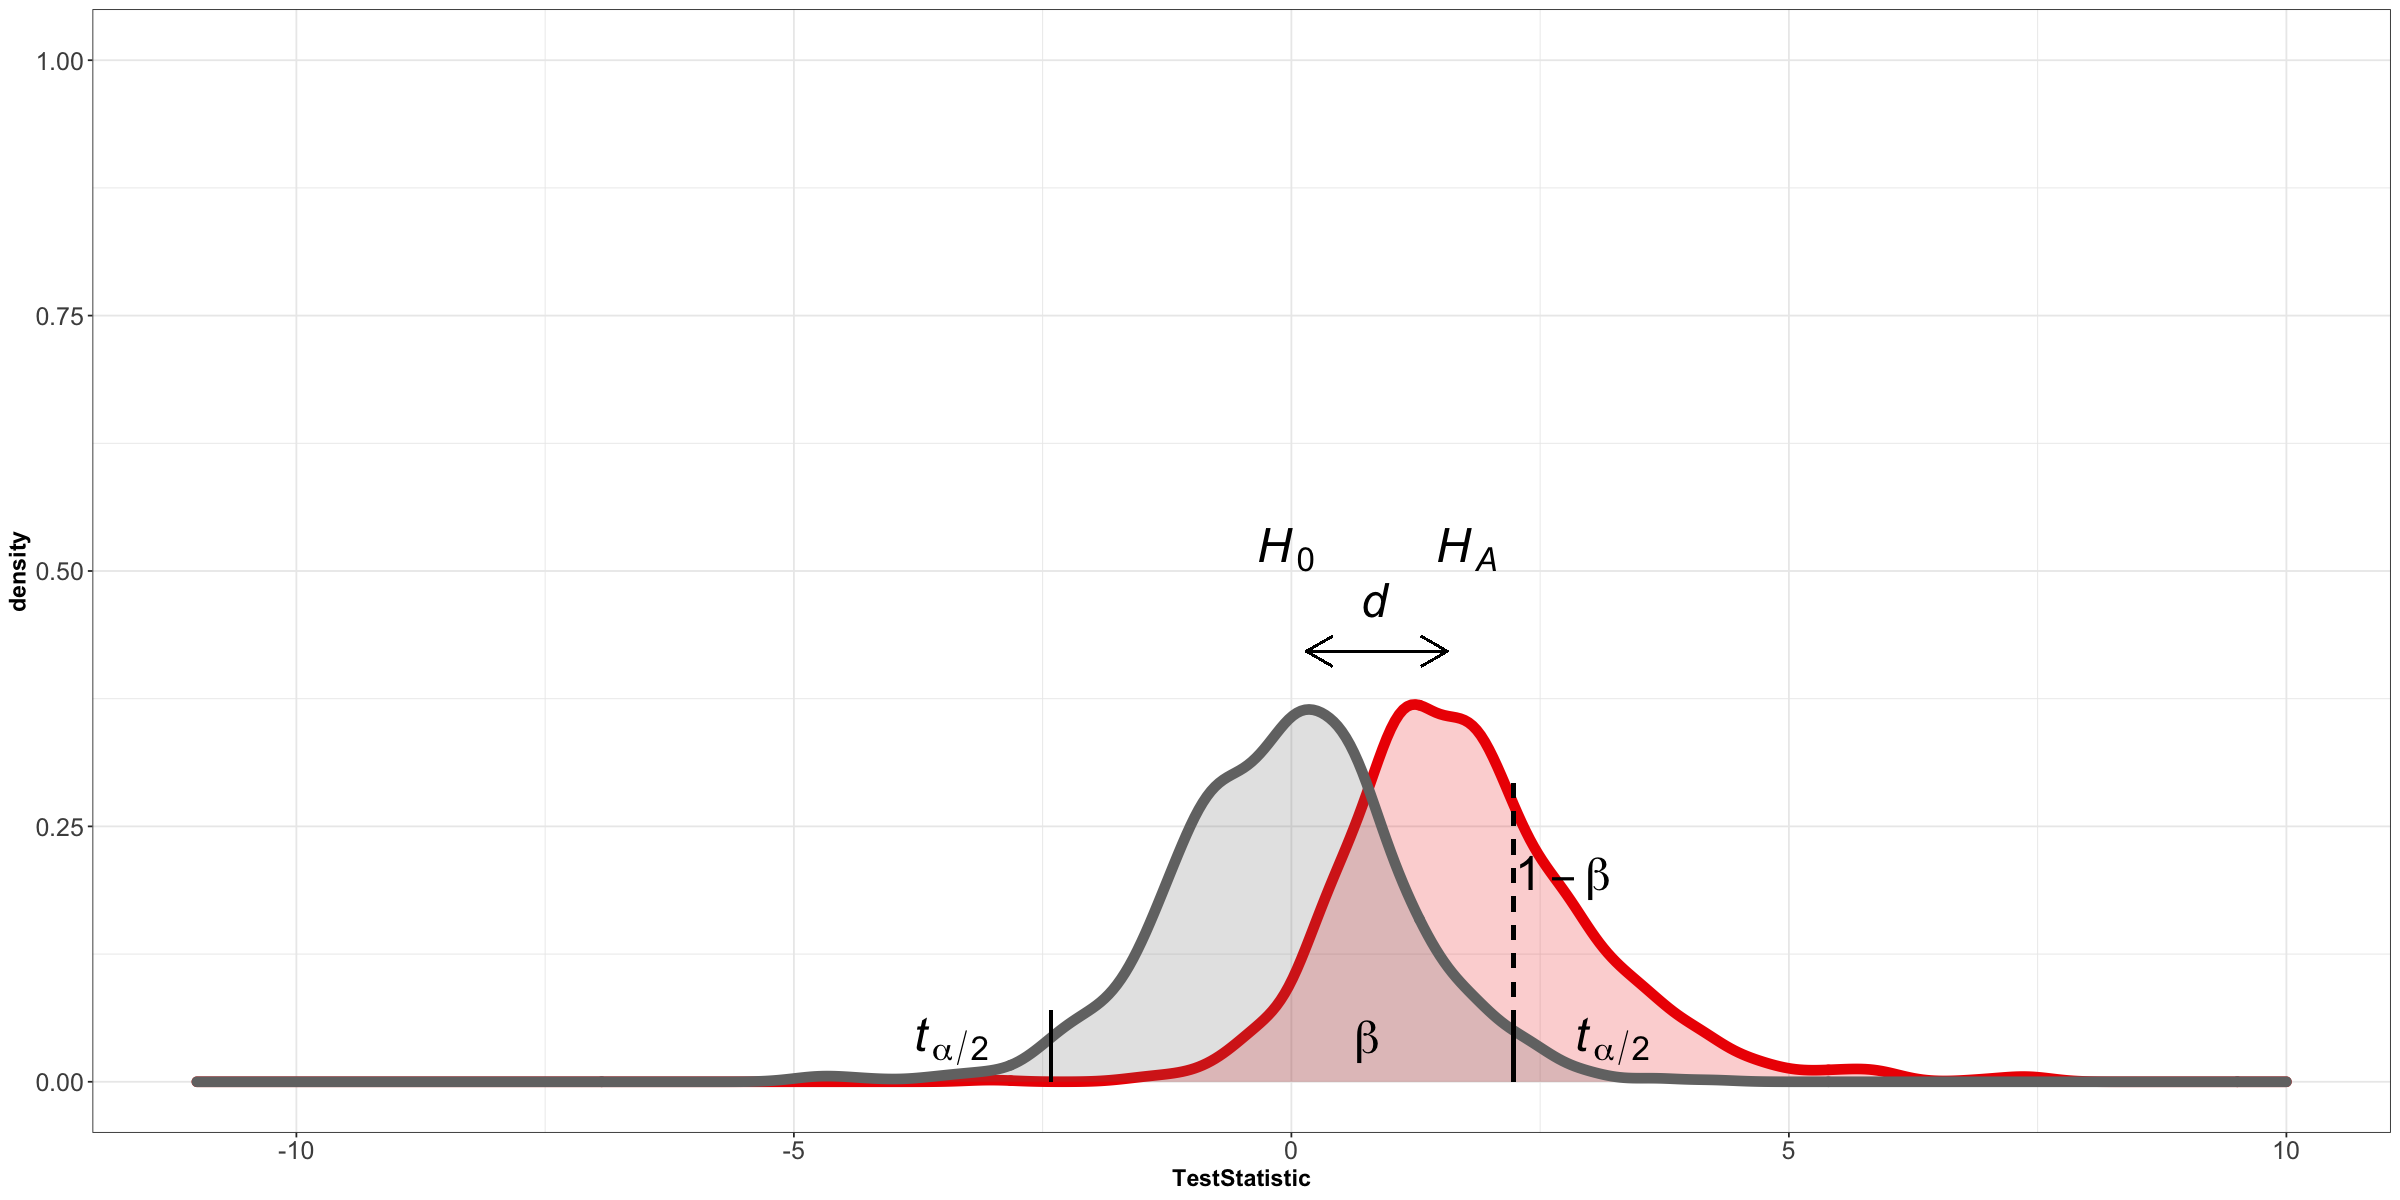

In [40]:
# Change plot size to X x Y
options(repr.plot.width=20, repr.plot.height=10)
# Plot
ggplot(dt, aes(x=TestStatistic)) +
  geom_density(aes(color=Hypothesis,fill=Hypothesis), lwd=3, alpha = 0.2)+
  scale_color_manual(values=c("red2", "grey45"))+
  scale_fill_manual(values=c("red2", "grey45"))+
  theme_bw()+
  theme(axis.text.x=element_text(size=15))+
  theme(axis.text.y=element_text(size=15))+
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))+
  theme(legend.position="none")+
  ylim(0,1) + xlim(-11,10)+
## Fill density

## TEXT
# Ho
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.1,
          label=expression(paste(italic(H[0]))))+
# Ha
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.1,
          label=expression(paste(italic(H[A]))))+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHo)+0.2,
                  y=max(TestStatisticsHo)/10,
                  xend=mean(TestStatisticsHa)-0.2,
                  yend=max(TestStatisticsHo)/10),
              arrow=arrow())+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHa)-0.2,
                  y=max(TestStatisticsHo)/10 ,
                  xend=mean(TestStatisticsHo)+0.2,
                  yend=max(TestStatisticsHo)/10),
              arrow=arrow())+
# Effect size label
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]) + (1/2 * mean(dt[Hypothesis == "alternative", TestStatistic])),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.05,
          label=expression(paste(italic(d))))+
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1) + 
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1)+
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.025))])-1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2])))) +
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))])+1,
          y=0.04,
          label=expression(paste(italic(t[alpha/2]))))+
# Power = 1-beta = sensitivity
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))])+0.5,
          y=0.2,col="black",
          label=expression(paste(italic(1-beta))))+
# True positives = power = 1-beta = sensitivity cutoff
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.975))]),
                  y=0,
                  yend=max(dt[Hypothesis == "null", TestStatistic])/14),
                  color="black", 
                  lty=2, lwd=1)+
# False negatives = type II error
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic])-1,
          y=0.04, col="black",
          label=expression(paste(italic(beta))))

**So power is sensitive to $N$**

**Recall that power depends on:**
> - the effect size (e.g. the magnitude of the distance between means) which can be absolute or relative
> - some expression of variability (e.g. sample standard deviation, $s$)
> -$N$
> - $\alpha$. Notice that, aside from considering departures from the $\alpha$ = 0.05 convention, the allocation of $\alpha$ to one or two tails of the $H_0$ affects power.

### Let's *change* $\alpha$ and see what happens
- First, note that we used a two-tailed test above, so $\alpha = 0.05/2 = 0.025$ per tail.
    - This is fine if we are agnostic to the direction of the the treatment effect...
    - But what if *revise* our hypothesis to be one-sided, that is:
        - $H_0$= $\overline{x}_{0} \nleq \overline{x}_{gf}$
        - $H_A$= $\neg H_0 \implies \overline{x}_{0} \leq \overline{x}_{gf}$
- Does this affect power?

In [41]:
## Test statistics
# Ho
TestStatisticsHo = replicate(1000,
                           t.test(x=rnorm(n=5, mean=25, sd=5),
                                  y=rnorm(n=5, mean=25, sd=5),
                                 alternative="greater")$statistic)

# Ha
TestStatisticsHa = replicate(1000,
                           t.test(x=rnorm(n=5, mean=30, sd=5),
                                  y=rnorm(n=5, mean=25, sd=5),
                                 alternative="greater")$statistic)
## Build data table
dt = data.table(
"ID"=seq(1,2000),
"Hypothesis"= c(rep("null",1000),rep("alternative",1000))
    )

## Add test statictic column
dt[, "TestStatistic" := c(TestStatisticsHo, TestStatisticsHa)] 

## Sanity checks
mean(dt[Hypothesis == "null", TestStatistic]) == mean(TestStatisticsHo)
mean(dt[Hypothesis == "alternative", TestStatistic]) == mean(TestStatisticsHa)

[1] TRUE

[1] TRUE

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


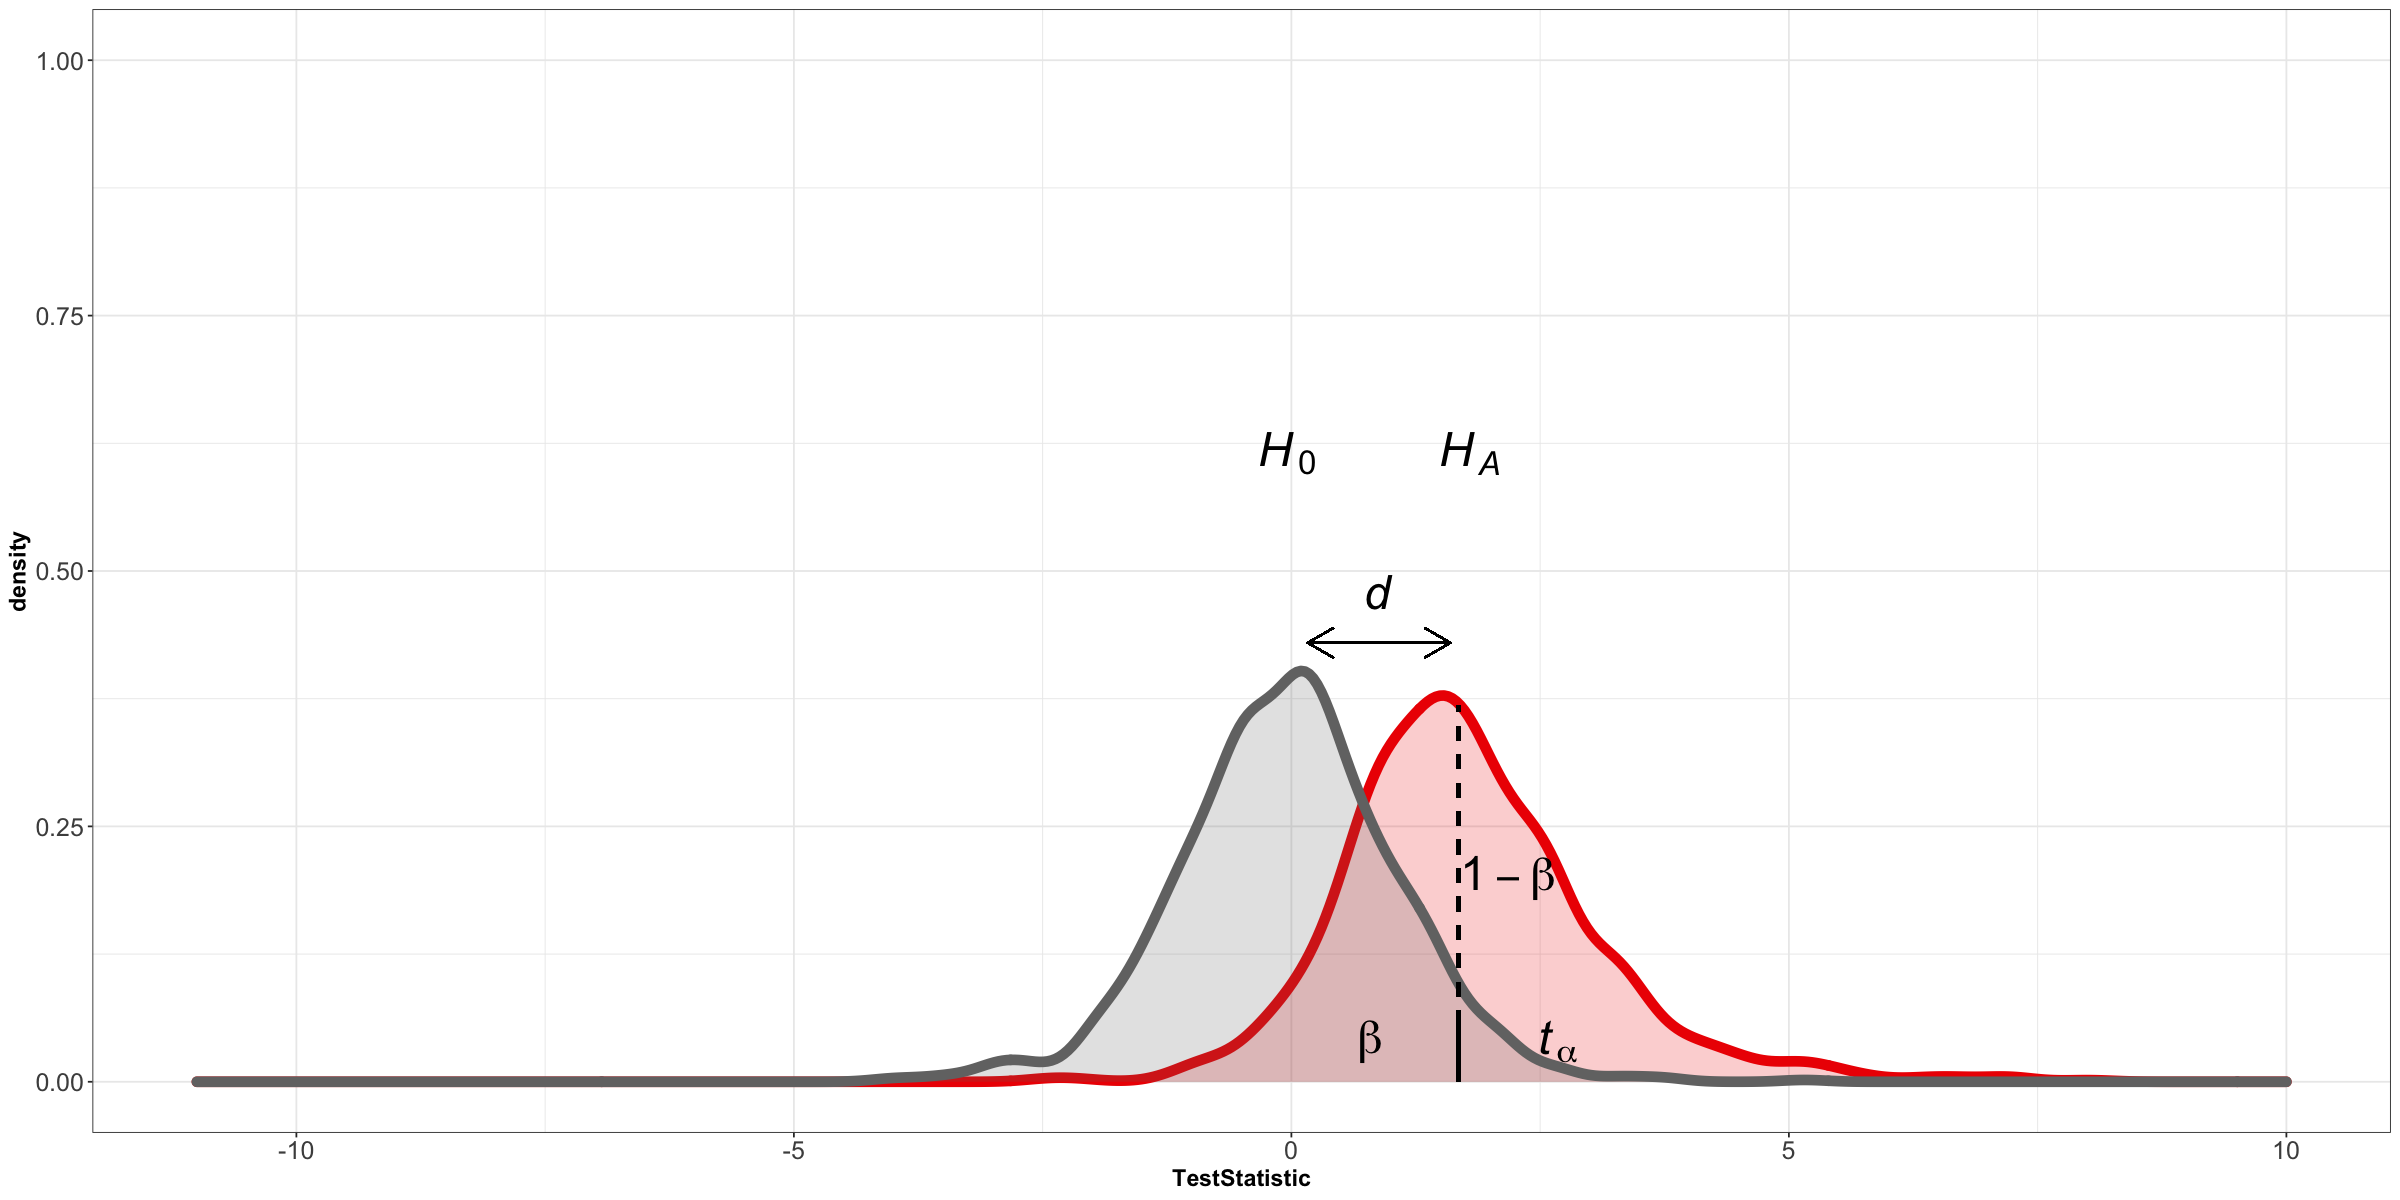

In [45]:
# Change plot size to X x Y
options(repr.plot.width=20, repr.plot.height=10)
# Plot
ggplot(dt, aes(x=TestStatistic)) +
  geom_density(aes(color=Hypothesis,fill=Hypothesis), lwd=3, alpha = 0.2)+
  scale_color_manual(values=c("red2", "grey45"))+
  scale_fill_manual(values=c("red2", "grey45"))+
  theme_bw()+
  theme(axis.text.x=element_text(size=15))+
  theme(axis.text.y=element_text(size=15))+
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))+
  theme(legend.position="none")+
  ylim(0,1) + xlim(-11,10)+
## Fill density

## TEXT
# Ho
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.1,
          label=expression(paste(italic(H[0]))))+
# Ha
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic]),
          y=max(dt[Hypothesis == "null", TestStatistic])/10 + 0.1,
          label=expression(paste(italic(H[A]))))+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHo)+0.2,
                  y=max(TestStatisticsHo)/12,
                  xend=mean(TestStatisticsHa)-0.2,
                  yend=max(TestStatisticsHo)/12),
              arrow=arrow())+
# Effect size arrow
 geom_segment(aes(x=mean(TestStatisticsHa)-0.2,
                  y=max(TestStatisticsHo)/12 ,
                  xend=mean(TestStatisticsHo)+0.2,
                  yend=max(TestStatisticsHo)/12),
              arrow=arrow())+
# Effect size label
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "null", TestStatistic]) + (1/2 * mean(dt[Hypothesis == "alternative", TestStatistic])),
          y=max(dt[Hypothesis == "null", TestStatistic])/12 + 0.05,
          label=expression(paste(italic(d))))+
# Critical value cutoffs
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))]),
                  y=0,
                  yend=0.07), color="black", 
                  lty=1, lwd=1)+
# Critical value labels
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))])+1,
          y=0.04,
          label=expression(paste(italic(t[alpha]))))+
# Power = 1-beta = sensitivity
 annotate("text",size=10,
          x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))])+0.5,
          y=0.2,col="black",
          label=expression(paste(italic(1-beta))))+
# True positives = power = 1-beta = sensitivity cutoff
 geom_segment(aes(x=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))]),
                  xend=max(sort(dt[Hypothesis == "null", TestStatistic])[(1: (length(dt[Hypothesis == "null", TestStatistic])*0.95))]),
                  y=0,
                  yend=max(dt[Hypothesis == "null", TestStatistic])/14),
                  color="black", 
                  lty=2, lwd=1)+
# False negatives = type II error
 annotate("text",size=10,
          x=mean(dt[Hypothesis == "alternative", TestStatistic])-1,
          y=0.04, col="black",
          label=expression(paste(italic(beta))))

**Notice anything?**

**So we know that power depends on:**
> - the effect size (e.g. the magnitude of the distance between means) which can be absolute or relative
> - some expression of variability (e.g. sample standard deviation, $s$)
> -$N$
> - $\alpha$. Notice that, aside from considering departures from the $\alpha$ = 0.05 convention, the allocation of $\alpha$ to one or two tails of the $H_0$ affects power.

**Of these, $N$, is probably the easiest to change**

## So... how many samples do I need?

...it depends...

The `pwr` package performs power calculations à la Cohen 1988 

- Recall our original data:

In [13]:
# Generate data
x_0 = rnorm(n=10, mean=25, sd=5)
# Generate data
x_gf = rnorm(n=10, mean=30, sd=5)

- And our original hypothesis:

$H_0$: $\overline{x}_{0} = \overline{x}_{gf}$

- When tested:

In [75]:
t.test(x=x_gf, y=x_0,
      alternative="two.sided",
      var.equal=TRUE)


	Two Sample t-test

data:  x_gf and x_0
t = 3.0936, df = 18, p-value = 0.006266
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.029379 10.618998
sample estimates:
mean of x mean of y 
 29.51772  23.19353 


To determine the number of samples we need for a given effect size, $d$, and standard deviation, $s$:

In [66]:
pwr.t.test(d=(mean(x_gf)-mean(x_0))/5,
           power=0.8,
           sig.level=0.05,
           #type="one.sample",
           alternative="two.sided")


     Two-sample t test power calculation 

              n = 10.86187
              d = 1.264838
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


**What if the means were closer?**

In [73]:
pwr.t.test(d=((mean(x_gf)-5)-(mean(x_0)+5))/5, # <-
           power=0.8,
           sig.level=0.05,
           alternative="two.sided")


     Two-sample t test power calculation 

              n = 30.03618
              d = 0.7351623
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


**What if the variability was greater?**

In [74]:
pwr.t.test(d=(mean(x_gf)-mean(x_0))/10, # <-
           power=0.8,
           sig.level=0.05,
           alternative="two.sided")


     Two-sample t test power calculation 

              n = 40.23212
              d = 0.6324189
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


**What if we *revised* the directionality of our hypothesis**?

In [78]:
pwr.t.test(d=(mean(x_gf)-mean(x_0))/10,
           power=0.8,
           sig.level=0.05,
           alternative="greater") # <-


     Two-sample t test power calculation 

              n = 31.61511
              d = 0.6324189
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


**What if we were conservative with $\alpha$**?

In [80]:
pwr.t.test(d=(mean(x_gf)-mean(x_0))/10,
           power=0.8,
           sig.level=0.01, # <-
           alternative="greater")


     Two-sample t test power calculation 

              n = 51.56109
              d = 0.6324189
      sig.level = 0.01
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


**Note that the `pwr` package contains functions for various applications:**
- one sample proportion
- even and uneven two sample proportions
- one and two sample balanced or unbalanced t-tests
- balanced one-way ANOVA
- $\chi^2$ test
- correlations
- GLMs

## Resources:

- Cohen's book: Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed.). Hillsdale,NJ: Lawrence Erlbaum.: http://www.utstat.toronto.edu/~brunner/oldclass/378f16/readings/CohenPower.pdf
- Points of significance: power and sample size: https://www.nature.com/articles/nmeth.2738
- For an interactive visualization, see: https://rpsychologist.com/d3/nhst/
- Power calculations in R with pwr à la Cohen (1988): https://cran.r-project.org/web/packages/pwr/pwr.pdf & https://www.statmethods.net/stats/power.html

## Graveyard

**Power function for t-tests**

In [81]:
TPower = function(n_sample=c(10,10), # Size of samples
                   n_simulations=1000, # number of simlations
                   means=c(0,0), # means of samples
                   sds=c(1,1)){ # standard deviations of samples
    # lower tail
    Lower = qt(.025, df=sum(n_sample) - 2) # loose two df to estimate means
    # upper tail
    Upper = qt(.975, df=sum(n_sample) - 2) # loose two df to estimate means
    # simulate test-statistics, ts
    TestStatistics = replicate(n_simulations,
       # t-test
       t.test(rnorm(n_sample[1], mean=means[1], sd=sds[1]),
              rnorm(n_sample[2], mean=means[2], sd=sds[2]))$statistic)
    # sum the number of test statistics less than the lower bound OR greater than the upper bound
    sum(TestStatistics < Lower | TestStatistics > Upper) / n_simulations
}

**plots with base R**

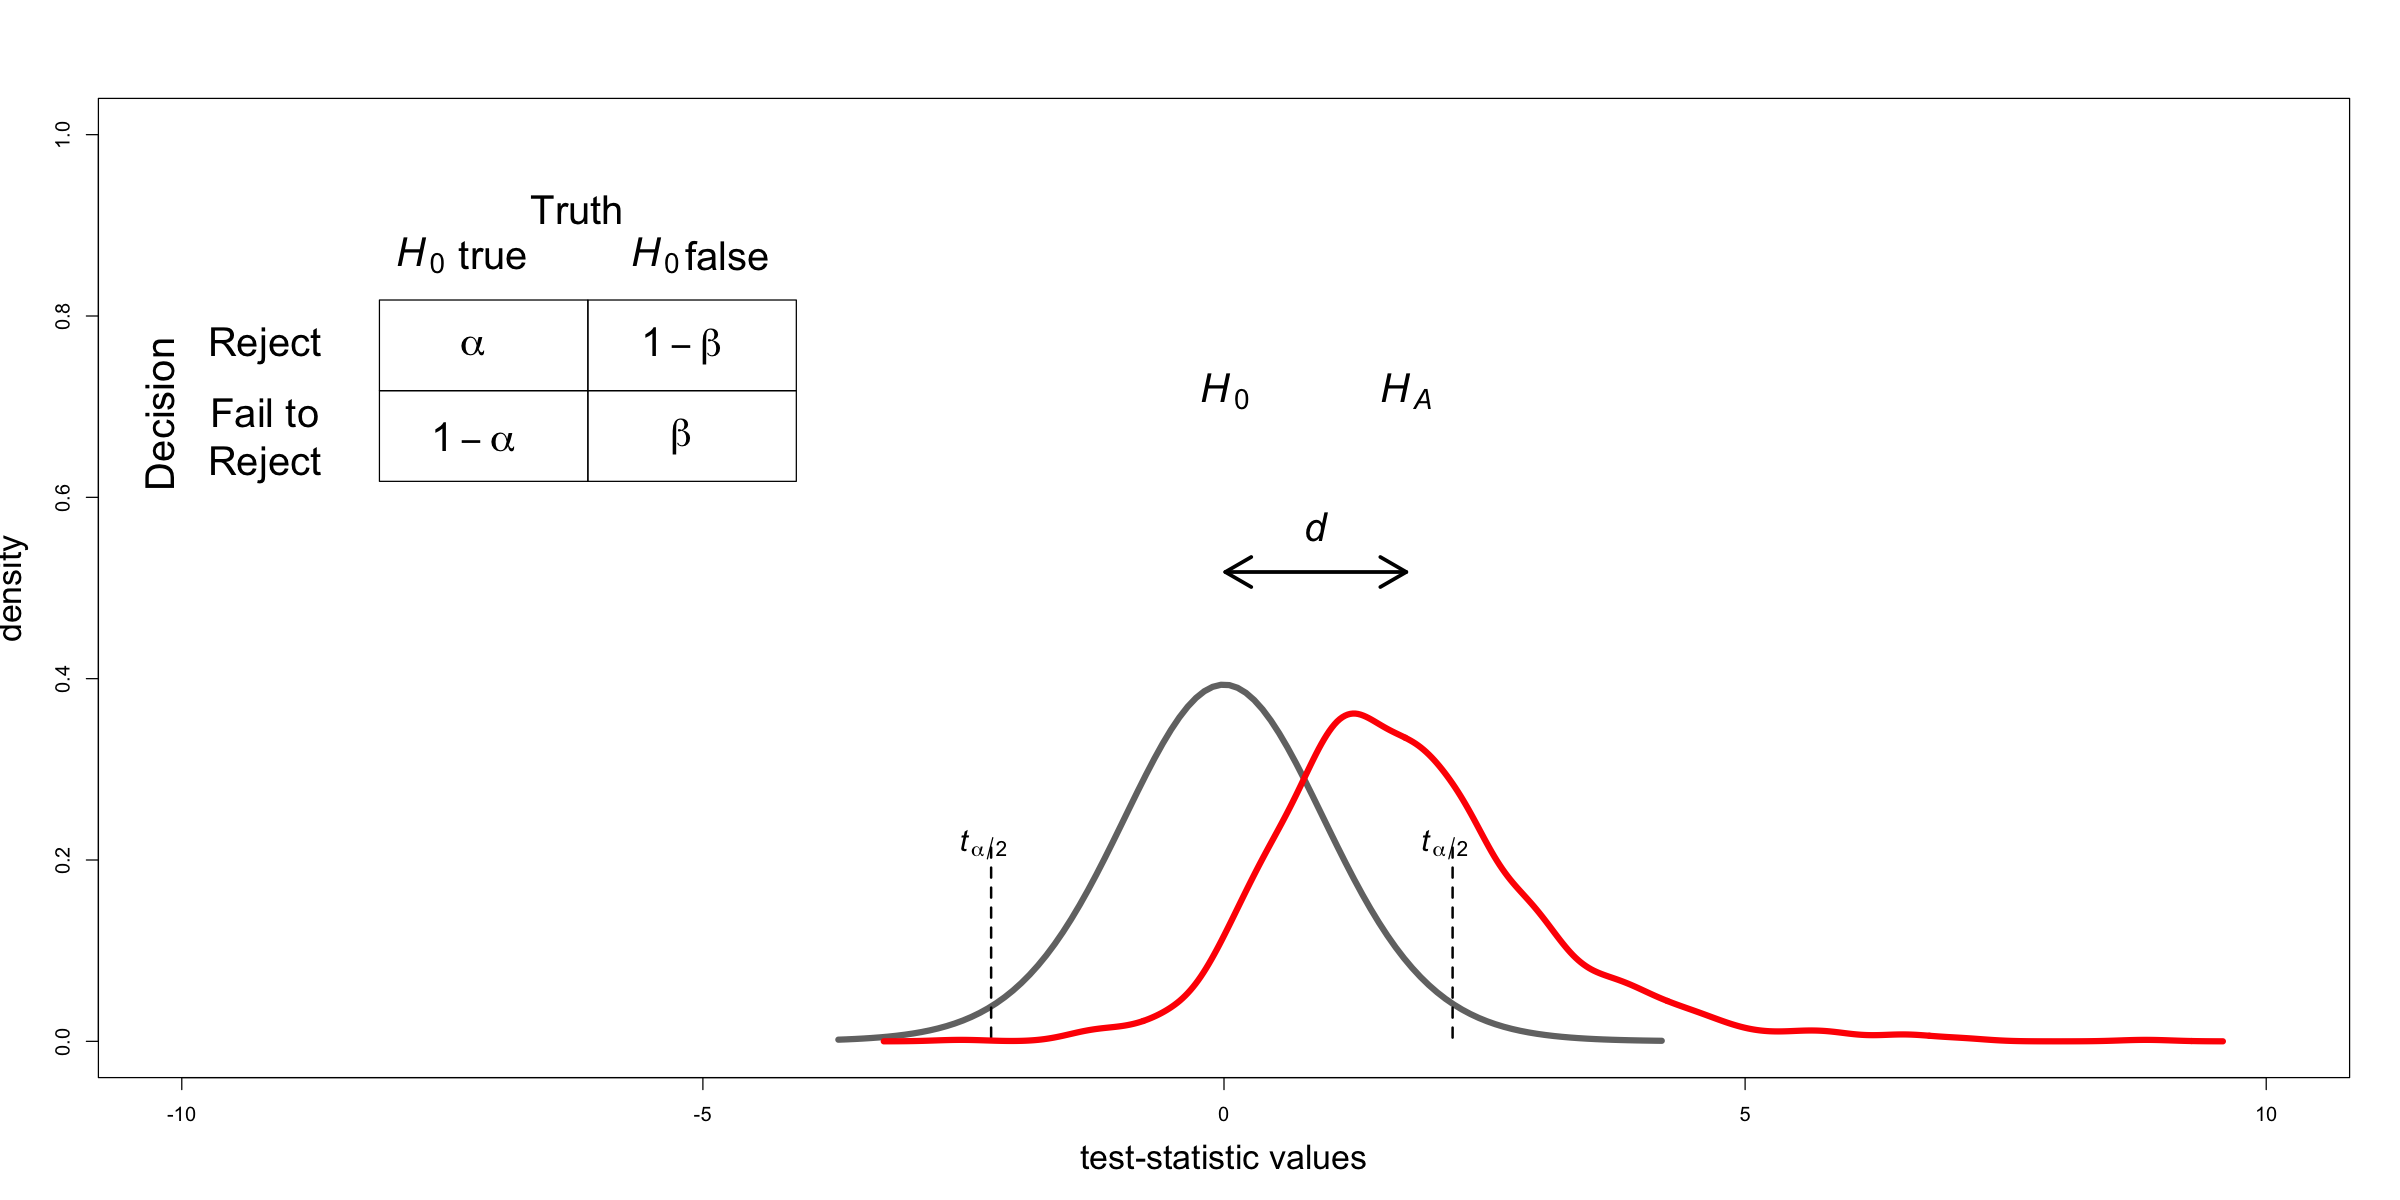

In [17]:
# Change plot size to 4 x 3
options(repr.plot.width=20, repr.plot.height=10)
#####################
### Distibutions
# Ho
plot(seq(round(range(TestStatisticsHo)[1],1), round(range(TestStatisticsHo)[2],1),length=100),
     dt(seq(round(range(TestStatisticsHo)[1],1), round(range(TestStatisticsHo)[2],1),length=100),
        df=18),
     col='grey45',
     type='l',lwd=5,
     xlim=c(-10,10),
     ylim=c(0,1),
     ylab="density", xlab="test-statistic values",
     cex.lab=1.7)
# Ho label
text(x=mean(TestStatisticsHo), y=max(TestStatisticsHo)/10 + 0.3,
    label = expression(paste(italic(H[0]))),
    cex=2)

# Critical value
ablineclip(v=c(max(sort(TestStatisticsHo)[(1: (length(TestStatisticsHo)*0.025))]), max(sort(TestStatisticsHo)[(1: (length(TestStatisticsHo)*0.975))]) ),
           lwd=2, lty=2, col="black",
           y1=0, y2=max(TestStatisticsHo)/10 - 0.2)
# # Critical value
text(x=c(max(sort(TestStatisticsHo)[(1: (length(TestStatisticsHo)*0.025))]-0.3), max(sort(TestStatisticsHo)[(1: (length(TestStatisticsHo)*0.975))]-0.3) ),
    y=max(TestStatisticsHo)/10 - 0.2,
    label=expression(paste(italic(t[alpha/2]))), 
    adj=0,cex= 1.5)

# Effect size arrow
arrows(x0=mean(TestStatisticsHo),
       x1=mean(TestStatisticsHa),
       y0=max(TestStatisticsHo)/10 + 0.1,
       y1=max(TestStatisticsHo)/10 + 0.1,
       lty=1, code=3, lwd=3, col="black")
# Effect size label
text(x=(mean(TestStatisticsHa) - (1/2 * mean(TestStatisticsHa))),
     y=max(TestStatisticsHo)/10 + 0.15,
    label = expression(paste(italic(d))),
    cex=2)

# Ha
lines(density(TestStatisticsHa),
      col="red",
      type='l', lwd=5)
# Ha label
text(x=mean(TestStatisticsHa), y=max(TestStatisticsHo)/10 + 0.3,
    label = expression(paste(italic(H[A]))),
    cex=2)

### Confusion matrix
## Labels
# Truth
text(x=min(TestStatisticsHo)-2.5,
     y=max(TestStatisticsHo)/10 + 0.5,
    label = "Truth",
    cex=2)
# H0 true
text(x=min(TestStatisticsHo)-4,
     y=max(TestStatisticsHo)/10 + 0.45,
    label = c(expression(paste(italic(H[0]))),"             true"),
    cex=2)
# # H0 false
text(x=min(TestStatisticsHo)-1.75,
     y=max(TestStatisticsHo)/10 + 0.45,
    label = c(expression(paste(italic(H[0]))),"             false"),
    cex=2)

# Decision
text(x=min(TestStatisticsHo)-6.5,
     y=max(TestStatisticsHo)/10 + 0.275,
    label = "Decision",
    cex=2,srt=90)
# Reject
text(x=min(TestStatisticsHo)-5.5,
     y=max(TestStatisticsHo)/10 + 0.35,
    label = "Reject",
    cex=2)
# Fail to reject
text(x=min(TestStatisticsHo)-5.5,
     y=max(TestStatisticsHo)/10 + 0.25,
    label = "Fail to\nReject",
    cex=2)

## Contents
# True positives
rect(xleft=min(TestStatisticsHo) - 2.4,
     xright=min(TestStatisticsHo) - 0.4,
     ytop=max(TestStatisticsHo)/10 + 0.4,
     ybottom=max(TestStatisticsHo)/10 + 0.3)
    # col=rgb(0,0,0,0.2))
# 1-beta = sensitivity
text(x=min(TestStatisticsHo) - 1.5,
     y=max(TestStatisticsHo)/10 + 0.35,
    label = expression(paste(italic(1-beta))),
    cex=2)

# False positives
rect(xleft=min(TestStatisticsHo) - 4.4,
     xright=min(TestStatisticsHo) - 2.4,
     ytop=max(TestStatisticsHo)/10 + 0.4,
     ybottom=max(TestStatisticsHo)/10 + 0.3)
     #col="firebrick")
# Alpha = type I error
text(x=min(TestStatisticsHo) - 3.5,
     y=max(TestStatisticsHo)/10 + 0.35,
    label = expression(paste(italic(alpha))),
    cex=2)

# True negatives
rect(xleft=min(TestStatisticsHo) - 4.4,
     xright=min(TestStatisticsHo) - 2.4,
     ytop=max(TestStatisticsHo)/10 + 0.3,
     ybottom=max(TestStatisticsHo)/10 + 0.2)
    #col=rgb(0.8,0,0,0.5))
# 1-Alpha = specificity
text(x=min(TestStatisticsHo) - 3.5,
     y=max(TestStatisticsHo)/10 + 0.25,
    label= expression(paste(italic(1-alpha))),
    cex=2)

# False negatives
rect(xleft=min(TestStatisticsHo) - 2.4,
     xright=min(TestStatisticsHo) - 0.4,
     ytop=max(TestStatisticsHo)/10 + 0.3,
     ybottom=max(TestStatisticsHo)/10 + 0.2)
    # col=rgb(0,0,0,0.5))
# beta = Type II error
text(x=min(TestStatisticsHo) - 1.5,
     y=max(TestStatisticsHo)/10 + 0.25,
    label = expression(paste(italic(beta))),
    cex=2)